<a href="https://colab.research.google.com/github/syedabusafwan/syedabusafwan/blob/practice/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:14<00:00, 58.0MB/s]
100% 812M/812M [00:14<00:00, 60.1MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.3282.jpg', 'cat.7844.jpg', 'cat.9437.jpg', 'dog.5325.jpg', 'dog.6044.jpg', 'cat.4147.jpg', 'cat.853.jpg', 'dog.1254.jpg', 'cat.7271.jpg', 'cat.7053.jpg', 'cat.7905.jpg', 'dog.3115.jpg', 'cat.2150.jpg', 'cat.4736.jpg', 'dog.5163.jpg', 'cat.9383.jpg', 'dog.6578.jpg', 'cat.3238.jpg', 'dog.9295.jpg', 'dog.12275.jpg', 'cat.3174.jpg', 'cat.12339.jpg', 'cat.4245.jpg', 'cat.6220.jpg', 'dog.5658.jpg', 'dog.8410.jpg', 'dog.12137.jpg', 'dog.12297.jpg', 'cat.8967.jpg', 'dog.5015.jpg', 'dog.10591.jpg', 'cat.8157.jpg', 'dog.8824.jpg', 'cat.4732.jpg', 'dog.1048.jpg', 'cat.11710.jpg', 'cat.3641.jpg', 'cat.2801.jpg', 'cat.8413.jpg', 'dog.3086.jpg', 'cat.5313.jpg', 'dog.7030.jpg', 'dog.10444.jpg', 'dog.405.jpg', 'dog.10387.jpg', 'dog.3627.jpg', 'dog.3755.jpg', 'dog.10274.jpg', 'cat.9256.jpg', 'cat.8588.jpg', 'cat.5110.jpg', 'cat.6670.jpg', 'dog.9457.jpg', 'dog.4918.jpg', 'cat.3833.jpg', 'dog.12005.jpg', 'dog.4214.jpg', 'cat.1756.jpg', 'dog.5490.jpg', 'cat.1525.jpg', 'cat.7956.jpg', 'cat.5937.jpg',

Importing  the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the images of dogs and cats

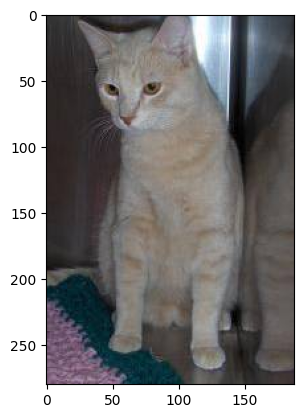

In [ ]:
# display dog image
img = mpimg.imread('/content/train/cat.2704.jpg')
imgplt = plt.imshow(img)
plt.show()

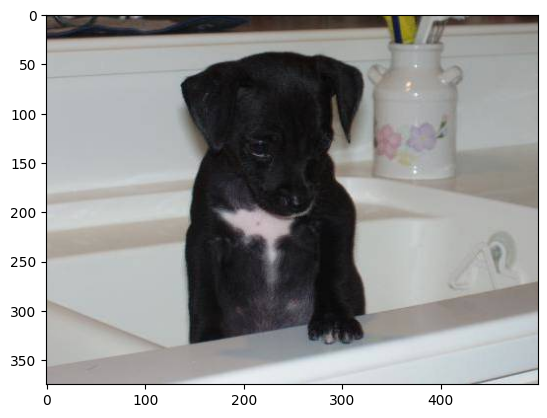

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

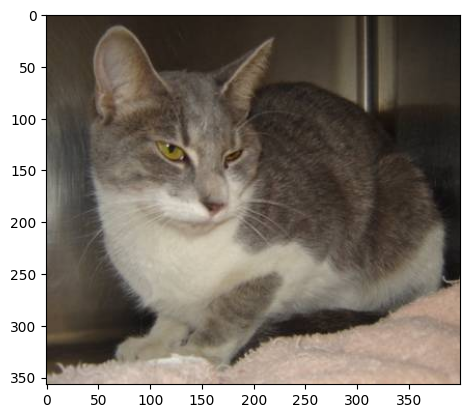

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

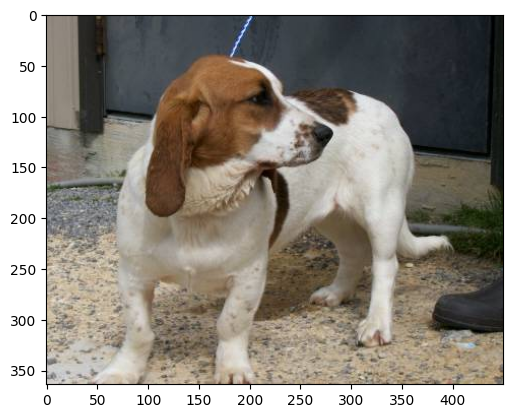

In [ ]:
img = mpimg.imread('/content/train/dog.300.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])


dog
cat
cat
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
      cat_count += 1

print('Number of dog image:', dog_count)
print('Number of cat image:', cat_count)


Number of dog image: 12500
Number of cat image: 12500


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


**Resizing all the images**

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.10001.jpg')
imgplt = plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/image resized/cat.10001.jpg'

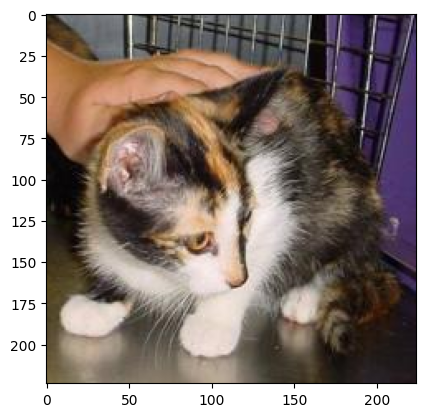

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10018.jpg')
imgplt = plt.imshow(img)
plt.show()



**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.3282.jpg', 'cat.7844.jpg', 'cat.9437.jpg', 'dog.5325.jpg', 'dog.6044.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 973 1027]


**Converting all the resized images to numpy arrays**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **New... HAPPY SAD **

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.19.0
astropy                          6.1.3
astropy-iers-data                0.2024.9.16.0.32.21
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread                        3.0.1
autograd               

In [ ]:
import tensorflow as tf
import os

**Remove Dodgy Image**

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/data'

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/data/happy/Happy People.jpg
Image not in ext list /content/data/happy/stock-photo-portrait-of-young-smiling-woman-looking-at-camer.jpg
Image not in ext list /content/data/happy/handsome-happy-african-american-bearded-260nw-2460702995.jpg
Image not in ext list /content/data/happy/220px-Shiny_Happy_People_Duggar_Family_Secrets_poster.jpg
Image not in ext list /content/data/happy/7-Habits-of-Happy-People.png
Image not in ext list /content/data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list /content/data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list /content/data/sad/silhouette-depressed-man-sadly-sitting-260nw-2242641921.jpg
Image not in ext list /content/data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list /content/data/sad/portrait-sad-man-600nw-126009806.jpg
Image not in ext list /content/data/sad/2ef1f06810af48f9a1219d098156eee9.webp
Image not in ext list /content/data/sad/sad-person-pictures-1920-x-108

**LOAD DATA**

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 160 files belonging to 2 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
batch[0]

array([[[[2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         ...,
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02]],

        [[2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         ...,
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02]],

        [[2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         ...,
         [2.52000000e+02, 2.53000000e+02, 2.55000000e+02],
         [

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

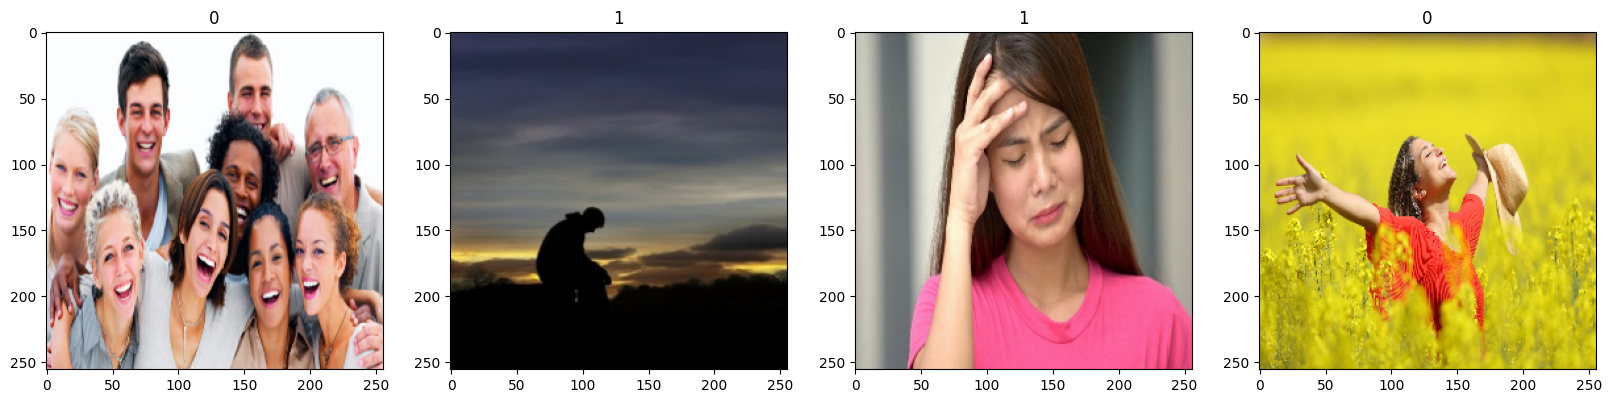

In [ ]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

class 1 = sad

class 0 = happy

**Preprocessing Data**

Scale Data

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

255.0

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.min()

0.0

In [ ]:
scaled.max()

1.0

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 160 files belonging to 2 classes.


In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

1.0

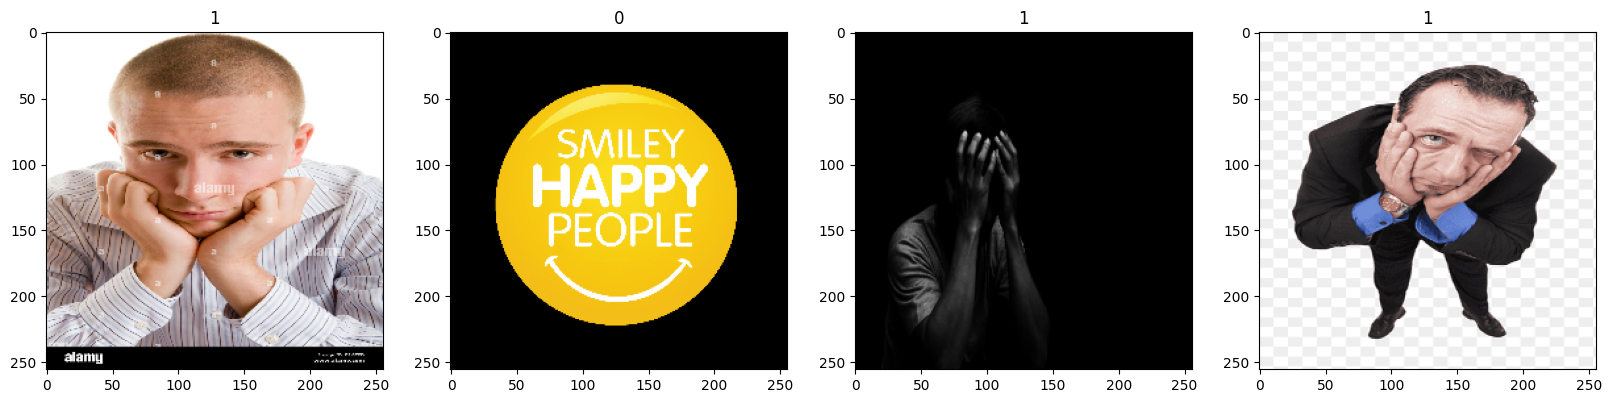

In [ ]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Spilit Data

In [ ]:
len(data)

5

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
val_size+train_size+test_size

5

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

**Deep Model**

Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
logdir='/content/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9818 - loss: 0.0220 - val_accuracy: 1.0000 - val_loss: 4.3212e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9727 - loss: 0.0275 - val_accuracy: 1.0000 - val_loss: 3.7157e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9896 - loss: 0.0095 - val_accuracy: 0.9688 - val_loss: 0.0230
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 3.0259e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9779 - loss: 0.0307 - val_accuracy: 0.9688 - val_loss: 0.0512
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9661 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9779 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 9.0342e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.9909 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss:

**Plot Performance**

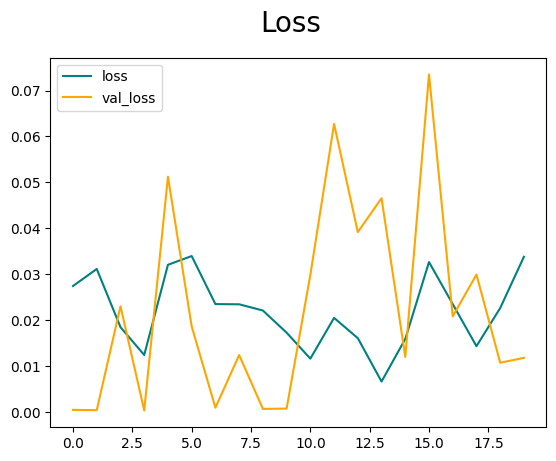

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

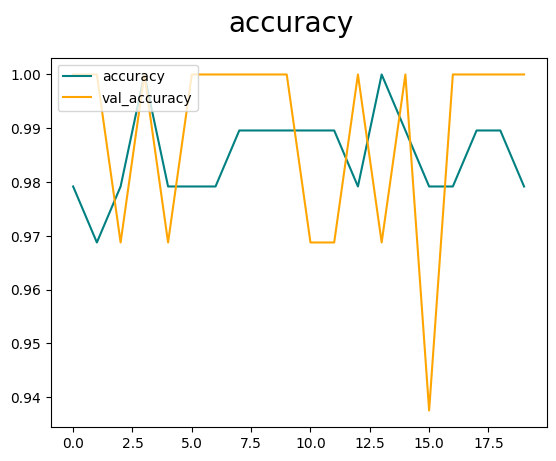

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evalute Performance**

evalute

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


***Test***

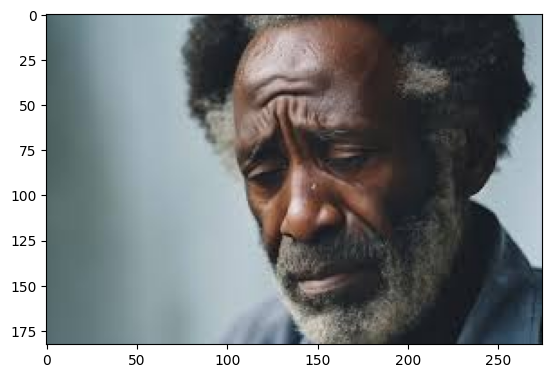

In [ ]:
img = cv2.imread('/content/images (1).jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

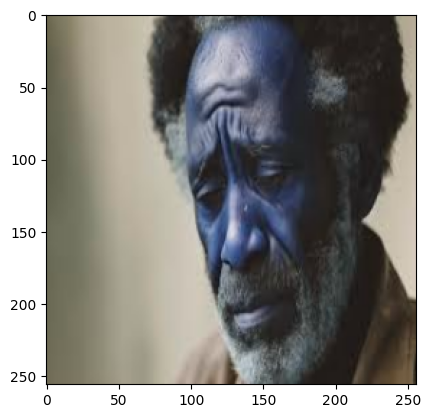

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0)

array([[[[108.03711 , 104.03711 ,  80.03711 ],
         [109.22266 , 105.22266 ,  81.22266 ],
         [111.37109 , 107.37109 ,  83.37109 ],
         ...,
         [181.81445 , 170.81445 , 150.44336 ],
         [180.22266 , 171.      , 151.      ],
         [180.96289 , 171.96289 , 151.96289 ]],

        [[108.03711 , 104.03711 ,  80.03711 ],
         [109.22266 , 105.22266 ,  81.22266 ],
         [111.37109 , 107.37109 ,  83.37109 ],
         ...,
         [181.81445 , 170.81445 , 150.44336 ],
         [180.73122 , 171.50856 , 151.50856 ],
         [180.98413 , 171.98413 , 151.98413 ]],

        [[107.75    , 103.75    ,  79.75    ],
         [108.93555 , 104.93555 ,  80.93555 ],
         [111.083984, 107.083984,  83.083984],
         ...,
         [182.0483  , 171.0483  , 150.78374 ],
         [181.1433  , 171.92064 , 151.92064 ],
         [181.      , 172.      , 152.      ]],

        ...,

        [[111.03711 , 106.03711 ,  85.03711 ],
         [112.      , 107.      ,  86.      ]

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [ ]:
yhat

array([[0.99999356]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad
